In [ ]:
#Task 1: Data Exploration and Preprocessing
#importing libraries 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [23]:
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")

In [25]:
#checking number of rows and columns
print("Number of rows are:",data.shape[0])
print("Number of columns are:",data.shape[1])


Number of rows are: 9551
Number of columns are: 21


In [24]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [26]:
#checking for duplicates 
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')


number of duplicated rows are 0


In [27]:
#Null Value Count 
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

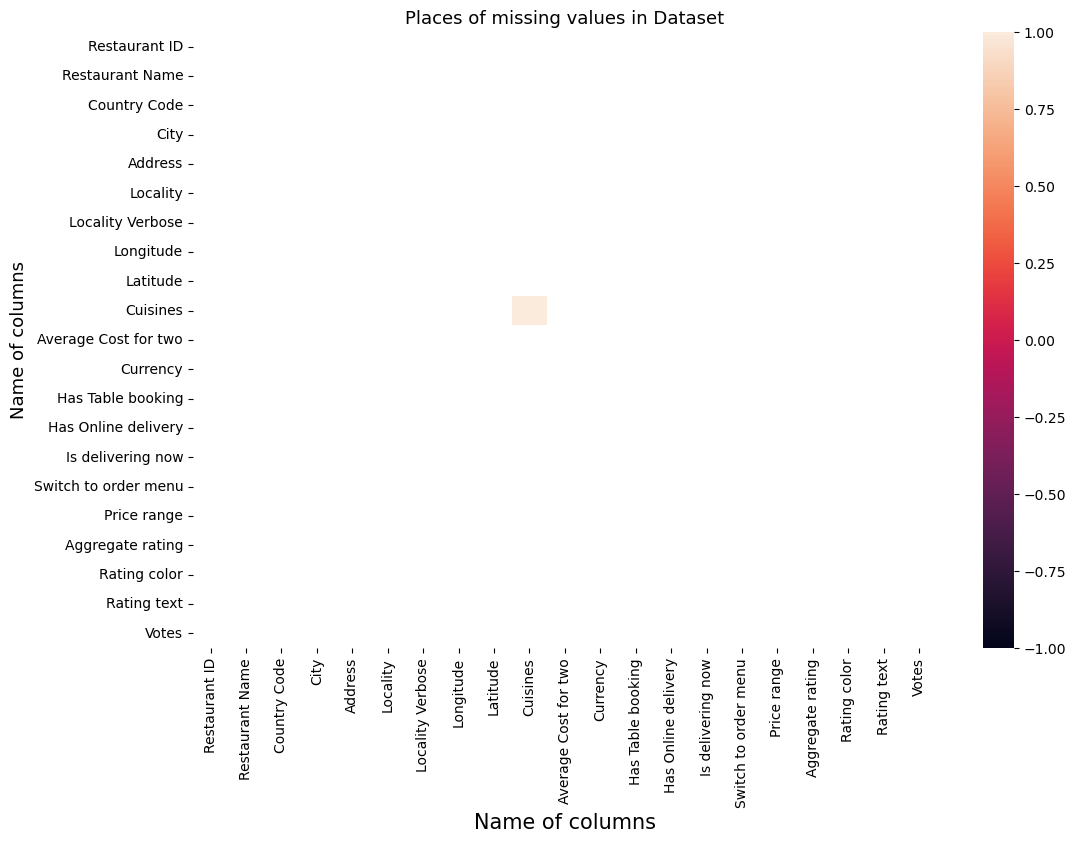

In [30]:
#visualising null values 
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull().corr(),vmin=-1,annot=True)
plt.xlabel('Name of columns', fontsize=15)
plt.ylabel('Name of columns', fontsize=13)
plt.title('Places of missing values in Dataset', fontsize=13)
plt.show()

In [33]:
#Handling missing values 
data = data.dropna(subset=['Longitude'])

In [34]:
print("Missing Values/Null Values count after handling:")
data.isna().sum()

Missing Values/Null Values count after handling:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [35]:
#Data Type conversion 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [36]:
#Aggregate rating and identifying class imbalances 
target_counts = data['Aggregate rating'].value_counts()
print(target_counts)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [3]:
#TASK2: DESCRIPTIVE ANALYSIS
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")


In [4]:
#BASIC STATISTICALMEASURES 
numeric_columns = data.select_dtypes(include=['int','float'])
summary_stats = numeric_columns.describe()
print (summary_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [6]:
#Calculate mean for numerical columns 
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Restaurant ID           9.051128e+06
Country Code            1.836562e+01
Longitude               6.412657e+01
Latitude                2.585438e+01
Average Cost for two    1.199211e+03
Price range             1.804837e+00
Aggregate rating        2.666370e+00
Votes                   1.569097e+02
dtype: float64


In [10]:
#Median
median = numeric_columns.median()
print(f"Median for numerical_columns:\n{median}")

Median for numerical_columns:
Restaurant ID           6.004089e+06
Country Code            1.000000e+00
Longitude               7.719196e+01
Latitude                2.857047e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [11]:
#Standard Deviation 
standard_dev = numeric_columns.std()
print(f"Standard Deviation for Numerical columns :\n{standard_dev}")

Standard Deviation for Numerical columns :
Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64


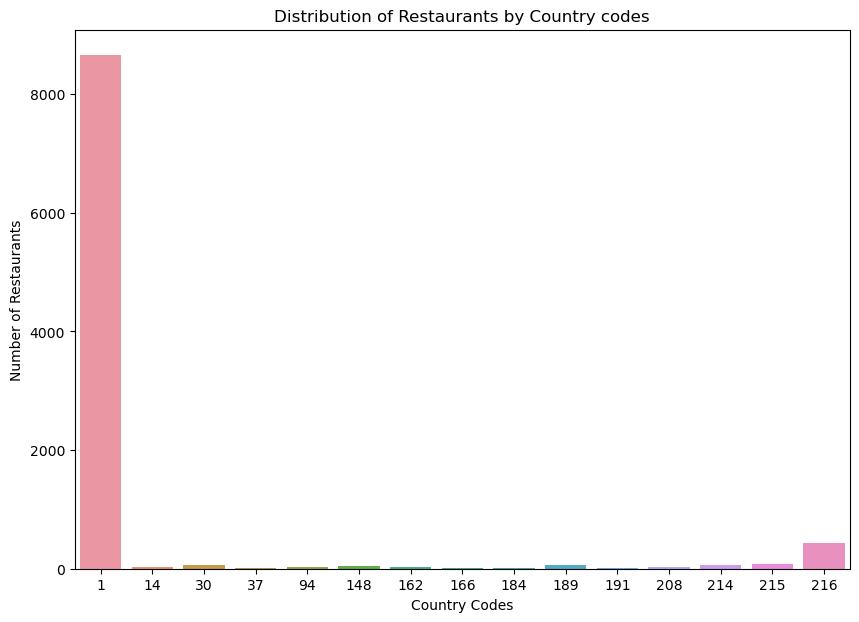

In [13]:
#distribution of categorical values 
# Count Plot Visualization Code for Country Codes
#set plot size
plt.figure(figsize=(10,7))
sns.countplot(x = data['Country Code'])
#Setlabels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country codes')
plt.show()

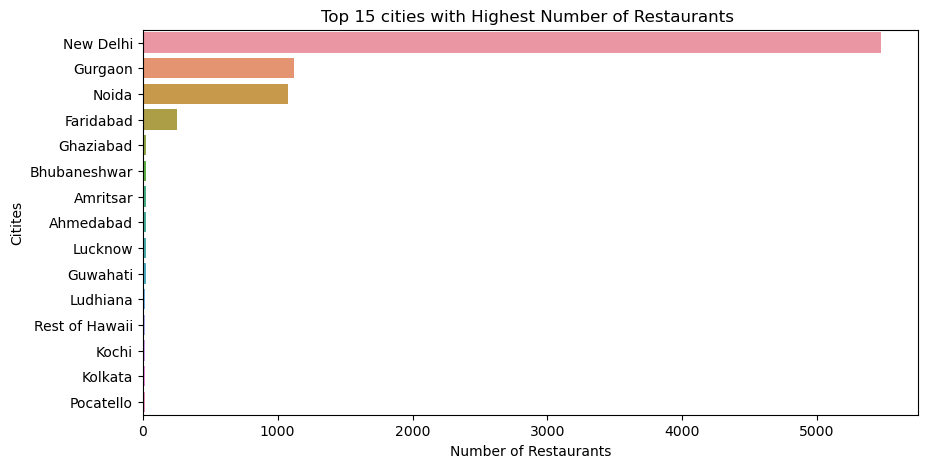

In [20]:
# Count Plot Visualization Code for Cities 
#set plot size
plt.figure(figsize=(10,5))
sns.countplot(y = data['City'],order=data.City.value_counts().iloc[:15].index)
#Setlabels
plt.xlabel('Number of Restaurants')
plt.ylabel('Citites')
plt.title('Top 15 cities with Highest Number of Restaurants ')
plt.show()



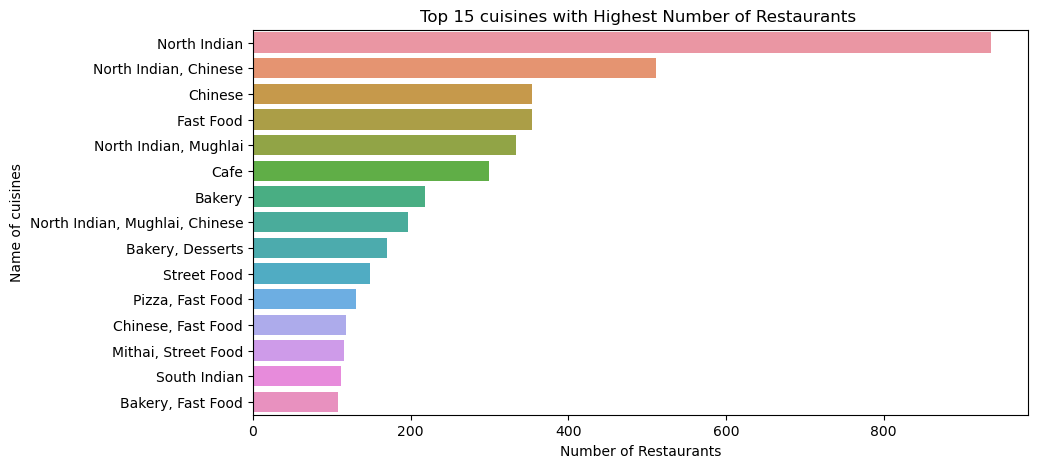

In [22]:
# Count Plot Visualization Code for Cuisines
plt.figure(figsize=(10,5))
sns.countplot(y = data['Cuisines'],order=data.Cuisines.value_counts().iloc[:15].index)
#Setlabels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of cuisines')
plt.title('Top 15 cuisines with Highest Number of Restaurants ')
plt.show()




In [24]:
# Top cuisines and cities with the highest number of restaurants
top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [25]:
#Top cities with highest number of restaurants 
top_cities = data['City'].value_counts().head(10)
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [1]:
#TASK3
import sys
!{sys.executable} -m pip install numpy

In [1]:
#Visualize the locations of restaurantson a map using latitude and longitude information.
# Correct import statement for Point
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Example usage
# Create a list of shapely Point objects
points = [Point(1, 2), Point(2, 1), Point(0, 0)]

# Create a GeoDataFrame
gdf = GeoDataFrame(geometry=points)

# Print the GeoDataFrame
print(gdf)


                  geometry
0  POINT (1.00000 2.00000)
1  POINT (2.00000 1.00000)
2  POINT (0.00000 0.00000)


C:\Users\8saik\AppData\Local\Temp\ipykernel_17124\3826256092.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


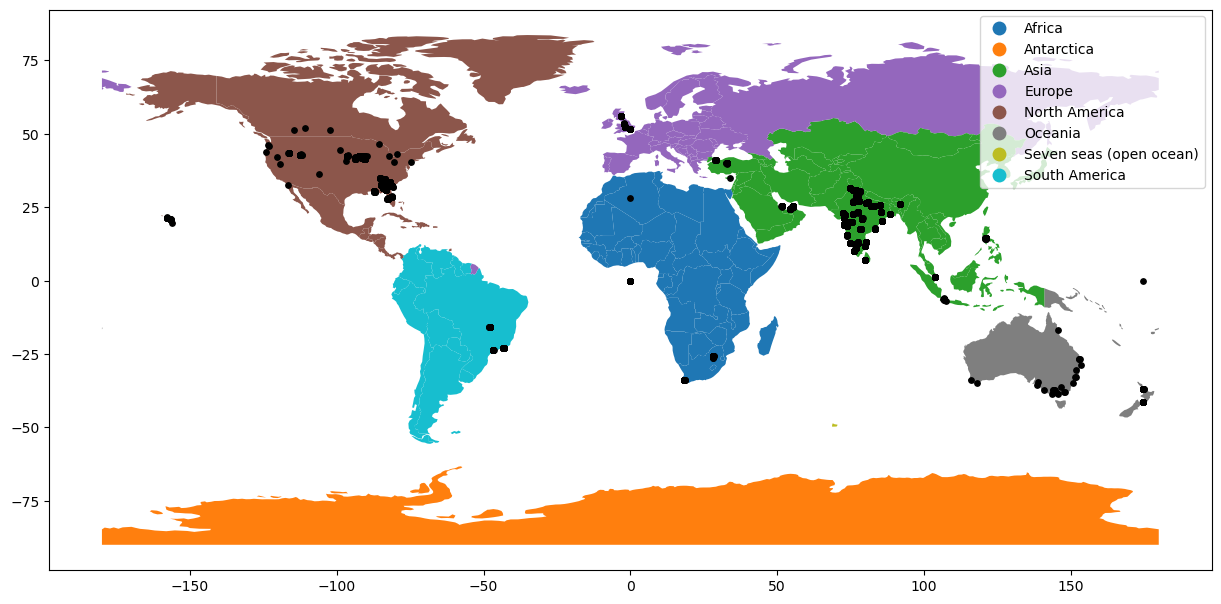

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")
# Assuming 'data' is your DataFrame that contains 'Longitude' and 'Latitude' columns
# Create GeoDataFrame with Point geometries
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Load the base map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the base map and the GeoDataFrame on the same axis
ax = world.plot("continent", legend=True, figsize=(15, 13))
gdf.plot(ax=ax, marker='o', color='black', markersize=15)

# Show the plot
plt.show()


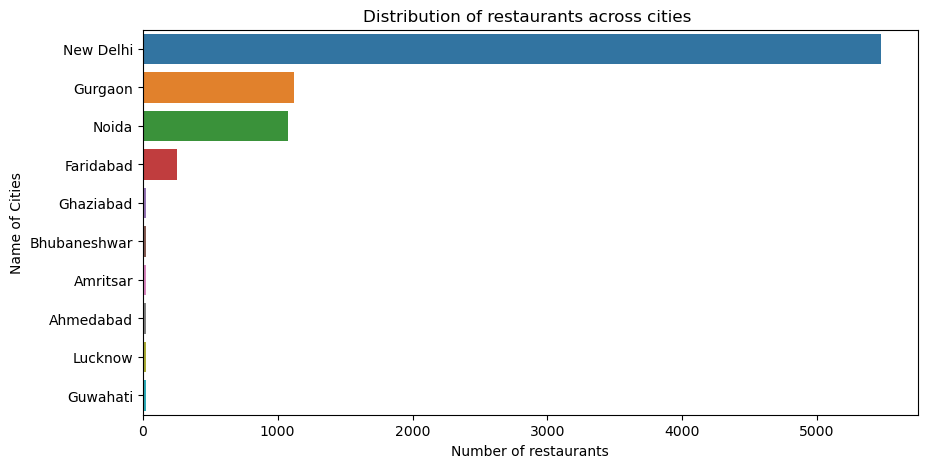

In [5]:
#Distribution of Restaurants by City 
plt.figure(figsize=(10,5))
sns.countplot(y =  data['City'],order = data.City.value_counts().iloc[:10].index) 
plt.xlabel('Number of restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of restaurants across cities ')         
plt.show()
           

In [ ]:
#Correlation of restaurant's Location and its Rating

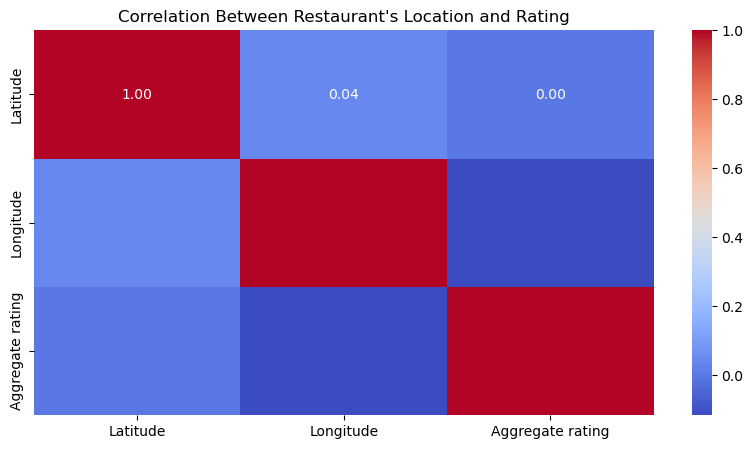

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")

# Assuming 'data' is your DataFrame that contains 'Latitude', 'Longitude', and 'Aggregate rating' columns
# Calculate the correlation matrix
correlation_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Create a figure with the specified size
plt.figure(figsize=(10, 5))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title("Correlation Between Restaurant's Location and Rating")

# Show the plot
plt.show()
